<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_fall_2022/blob/main/exercises/Ph_2320_E10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider a mass attached to a spring that allows the mass to oscillate about its equilibrium position $x_0 = 0$ meters as shown below. The equilibrium position is that in which the spring is neither compressed nor elongated. 

.

In panel (d), the mass is at $x_0$ and has maximum velocity moving to the right. As soon as the mass is to the right of the equilibrium position, the spring is elongated and produces a force in the negative direction. There is also friction $\vec{f_k}$ in the direction opposite to the velocity. The spring force $F_s$ increases in magnitude with the elongation of the spring according to Hooke's law, $F_s = -k \Delta \vec{x}$, were $k$ is the spring constant and $\Delta \vec{x}$ is the displacement from equilibrium. Since the velocity is in the positive direction and the acceleration is in the negative direction, the mass eventually stops at some distance $A$ from equilibrium, as shown in panel (a). There is still a force pulling the mass towards the origin, so the mass will accelerate in the negative direction, with an acceleration that is decreasing in magnitude until it becomes zero at the origin. At this stage, the velocity will be maximal and in the negative direction, as shown in panel (b). 

.

As soon as the mass is to the left of the equilibrium position, the spring is compressed and produces a force in the positive direction according to Hooke's law. There is also friction $\vec{f_k}$ in the direction opposite to the velocity. Since the velocity is in the negative direction and the acceleration is in the positive direction, the mass eventually stops at some distance $-A$ from equilibrium, as shown in panel (c). The whole cycle then repeats, but each time with less energy since the friction is always removing energy from the system. This is a [damped harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator). 



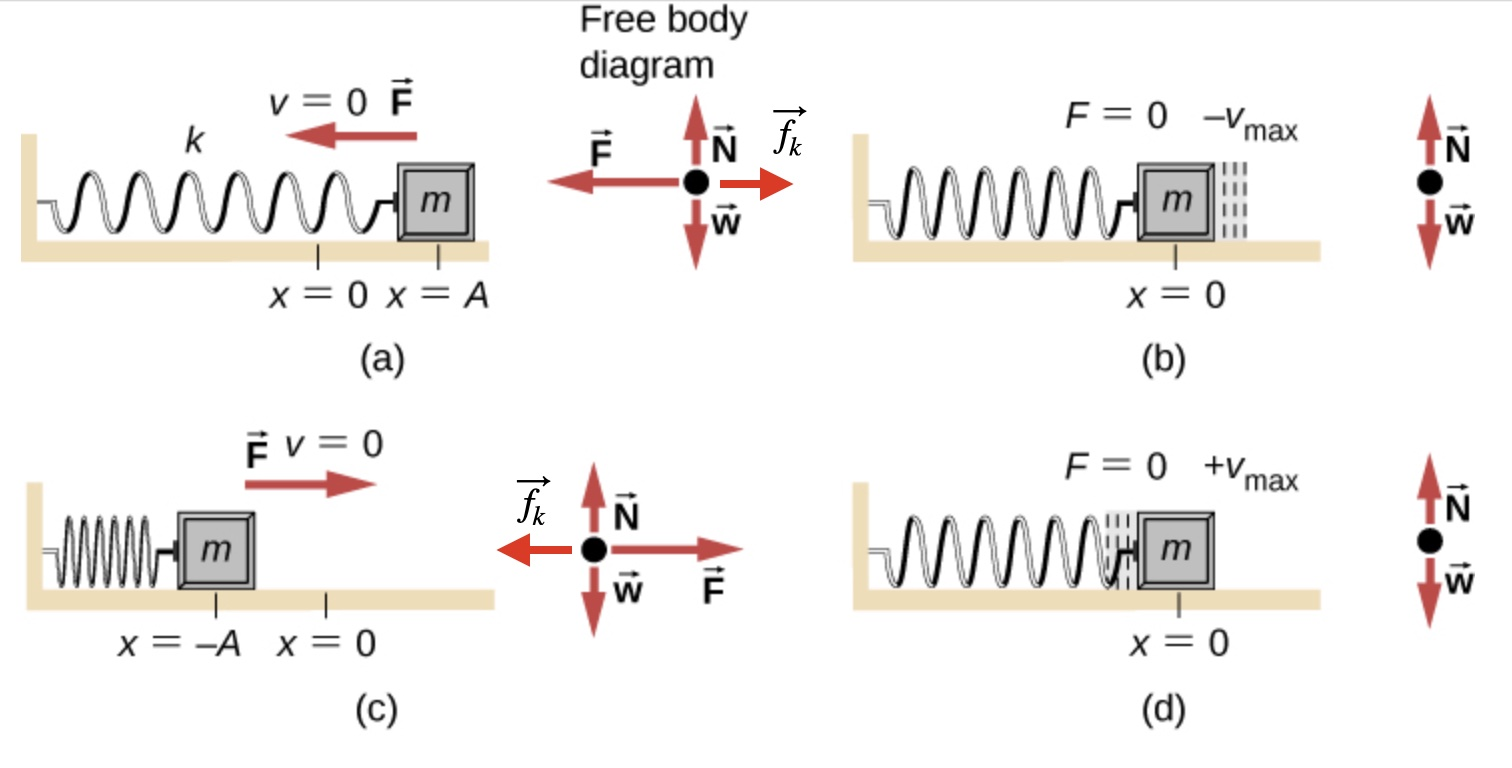

For this exercise, you will put together the main concepts that you have learned about so far in this class: kinematic equations, forces, and conservation of energy. You will simulate a mass of $m=1$ kg attached to a one-dimensional spring of spring constant $k=1$ N/m oscillating about its equilibrium position and in the presence of friction. The equilibrium position will be $x_0 = 0$ m and at time $t=0$ s, the mass will be at its equilibrium and will be moving to the right at $v=1$ m/s. Since the spring force is zero at the equilibrium position, the acceleration at $t=0$ is $a=0$ m/s$^2$. We set the initial conditions by giving appropriate values to the python variables. We initialize the coefficient of kinetic friction, $\mu_k = 0.001$.

In [90]:
# Make our lives easier
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
# Initialization
position = 0.0 # position in meters
velocity = 1.0 # velocity in meters per second
acceleration = 0.0 # acceleration in meters per second^2
force = 0.0 # force in Newtons
time = 0.0 # time in seconds
spring_constant = 1.0 # force constant in kg/second^2
mass = 1.0 # mass in kg
time_step = 0.001 # time step in seconds
g = 9.8 # acceleration due to gravity m/s^2
mu = 0.001 # coefficient of kinetic friction


The following *molecular dynamics* code uses the kinematic equations to continually update the position, velocity and, through Hooke's law and a phenomenological model for the friction, the acceleration of the mass. The kinematic equations arise from integrating the equations of motion with constant acceleration, which does not occur in the case of the mass/spring system since the force (and hence the acceleration) is a function of the displacement. Nevertheless, the acceleration is constant if the time step we consider is infinitesimally small. A computer can approximate this by using very small time steps. For our simulation, a time step $\Delta t = 0.01$ s produces good results. The results are plotted below the code.

In [101]:
# Creating Arrays
time_list = [time]
position_list = [position]
velocity_list = [velocity]
acceleration_list = [acceleration]
force_list = [force]

# Starting Loop
i=1
while i < 200000:
    time = time + time_step
    position = position + velocity*time_step + (1/2)*(acceleration*time_step**2)
    velocity = velocity + acceleration*time_step
    spring_force = -spring_constant*position

    if velocity < 0: # moving to the left
      friction_force = mu*mass*g #friction to the right
      #if abs(friction_force) > abs(spring_force):
      #  friction_force = spring_force
    else: # moving to the right
      #friction_force = -mu*mass*g # friction to the left
      #if abs(friction_force) > abs(spring_force):
      friction_force = -mu*mass*g


    force = spring_force + friction_force

    acceleration = force/mass
    time_list.append(time)
    position_list.append(position)
    velocity_list.append(velocity)
    acceleration_list.append(acceleration)
    force_list.append(force)
    i = i + 1

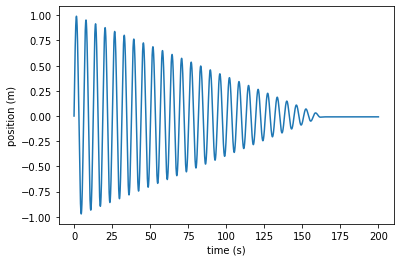

In [102]:
position_series = pd.Series(position_list, index=time_list)
position_series.plot(ylabel="position (m)", xlabel="time (s)")

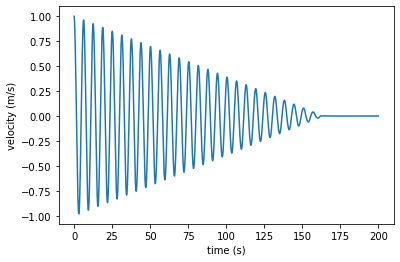

In [103]:
velocity_series = pd.Series(velocity_list, index=time_list)
velocity_series.plot(ylabel="velocity (m/s)", xlabel="time (s)")

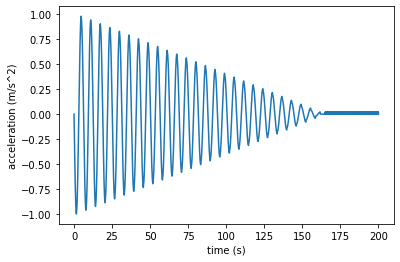

In [104]:
acceleration_series = pd.Series(acceleration_list, index=time_list)
acceleration_series.plot(ylabel="acceleration (m/s^2)", xlabel="time (s)")

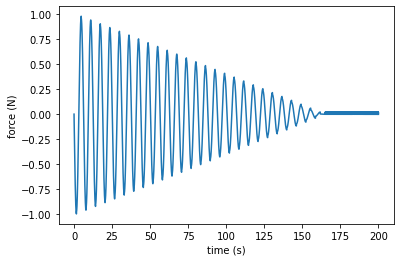

In [105]:
force_series = pd.Series(force_list, index=time_list)
force_series.plot(ylabel="force (N)", xlabel="time (s)")

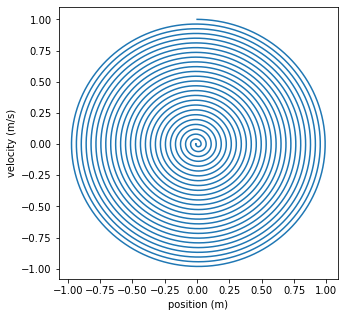

In [106]:
phase_series = pd.Series(velocity_series.values, index=position_series.values)
phase_series.plot(xlabel="position (m)", ylabel="velocity (m/s)", figsize=(5,5))

The mass has maximum velocity $v_{\rm max}$ at the equilibrium position, whereas the velocity is zero at the maximum displacement on either side $|x_{\rm max}|= A$. Since the kinetic energy is $K = \frac{1}{2}mv^2$ and the spring potential energy is $U = \frac{1}{2}k \Delta x^2$, the kinetic energy is maximum at the equilibrium position (where the potential energy is zero) and the potential energy is maximum at the position extrema (where the kinetic energy is zero). Since energy is conserved in an isolated system, the nature of the energy in the mass/spring simple harmonic motion system is always oscillating between kinetic and potential. Nevertheless, because of friction, the system is always losing energy, so $|x_{\rm max}|= A$ is always getting smaller. Below, we use the list of positions and velocities generated by the dynamics simulation to compute the potential and kinetic components of the total energy as a function of time and as a function of the position. 

## Action items

1. Set the variable mu = 0.002 and run the code again. What happens to $x(t)$, $v(t)$, and $a(t)$? Explain in terms of forces.  

2. Set the variable mu = 0.002 and run the code again. What happens to $x(t)$, $v(t)$, and $a(t)$? Explain in terms of conservation of energy. 

3. How does the curve of the spring potential energy look like? Draw and show in your video summary. 

4. How does the curve of the kinetic energy look like? Draw and show in your video summary. 

5. How does the curve of the total energy look like? Draw and show in your video summary. Is energy conserved? Why yes or why not. 